**HEART DISEASE**


Heart disease is a class of diseases that involve the heart or blood vessels. Cardiovascular diseases are the leading cause of death globally. This is true in all areas of the world except few. Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s. This heart disease classifier uses historical dataset of patients to classify heart disease. Various features available in the dataset are used for prediction of heart disease.



About the Dataset

This database contains 76 attributes, but all published experiments refer to using a subset of 13 of them.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 which means presence of no hear disease and 1 means presence of disease. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence i.e value 1 from absence (value 0).

The data includes 303 patient level features including if they have heart disease at the end or not. Features are like; Age: Obvious one.

    Sex:

    0: Female
    1: Male

    Chest Pain Type:

    0: Typical Angina
    1: Atypical Angina
    2: Non-Anginal Pain
    3: Asymptomatic

    Resting Blood Pressure: Person's resting blood pressure.
    Cholesterol: Serum Cholesterol in mg/dl
    Fasting Blood Sugar:

    0:Less Than 120mg/ml
    1: Greater Than 120mg/ml

    Resting Electrocardiographic Measurement:

    0: Normal
    1: ST-T Wave Abnormality
    2: Left Ventricular Hypertrophy

    Max Heart Rate Achieved: Maximum Heart Rate Achieved
    Exercise Induced Angina:

    1: Yes
    0: No

    ST Depression: ST depression induced by exercise relative to rest.
    Slope: Slope of the peak exercise ST segment:

    0: Upsloping
    1: Flat
    2: Downsloping

    Thalassemia: A blood disorder called 'Thalassemia':

    0: Normal
    1: Fixed Defect
    2: Reversable Defect

    Number of Major Vessels: Number of major vessels colored by fluoroscopy.


In [1]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for data splitting
from sklearn.model_selection import train_test_split

#for the model prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# We are reading our data
df = pd.read_csv("../input/heart-disease-uci/heart.csv")

# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Change the column names for better understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


In [4]:
#Finding the shape of the dataframe
df.shape

(303, 14)

In [5]:
# Describing the Dataframe
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Finding information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [7]:
#Finding the missing values. In this dataframe there is no missing value.
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

Let's see the percentage of patients who really have heart disease and the one without any heart disease. 

In [8]:
#Finding the percentage of patients with heart disease and the one without heart disease

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))


Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


As target = 1 means the patient has a heart disease so we will use age parameter to check the frequency of heart disease using matplotlib.

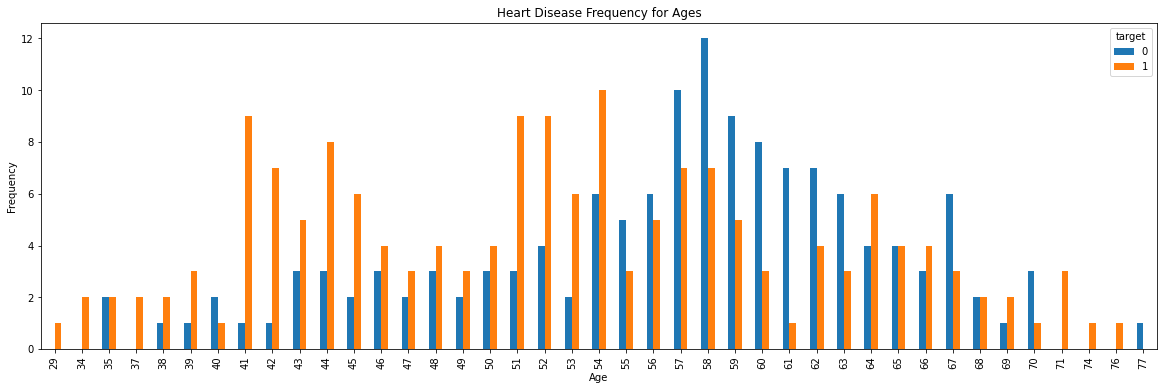

In [9]:
#Finding heart disease frequency with the age parameter

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [10]:
#Finding all the unique value of 'cheat_pain_type' parameter
df.chest_pain_type.unique()

array([3, 2, 1, 0])

Now we will use plotly to check the count of 'chest_pain_type'. There are more advantage of plotly over seaborn or matplotlib. Just move the cursor over the plot below.

In [11]:
#Finding the count of all the type of 'chest_pain_type' 
c = df["chest_pain_type"].value_counts()
labels = c.index
fig = px.bar(c, title = "Chest pain type", text = c)
fig.show()

Now in the graph below matplotlib is used and when you move the cursor over the plot the properties won't be shown as in the plotly.

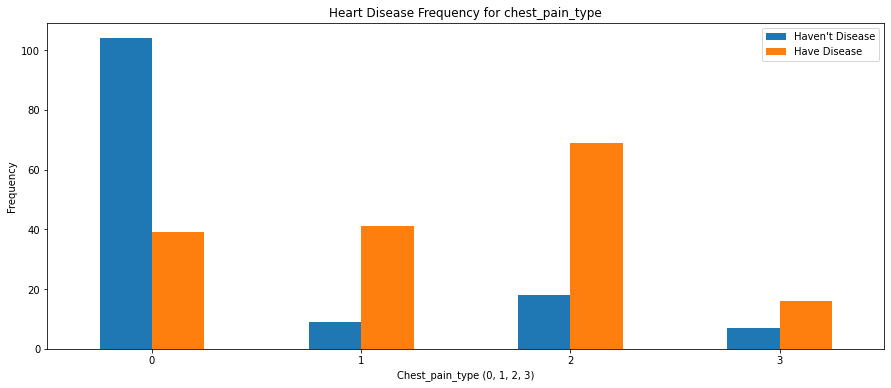

In [12]:
#Relation of heart disease with chest_pain_type. Here the chest_pain_type 2 has highest chance to have heart disease
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for chest_pain_type')
plt.xlabel('Chest_pain_type (0, 1, 2, 3)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

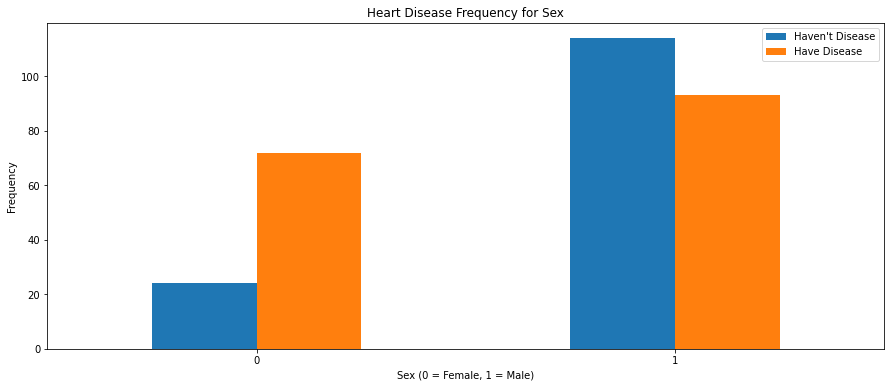

In [13]:
#Relation of heart disease with sex
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Here the scatter plot of plotly is used to find relation between max_heart_rate and the age parameter. As we can see high heart rate is achieved by younger people with heart disease and with older people the heart rate is not that high with heart disease.

In [14]:
#Using scatter plot to find relation of max_heart_rate achieved with age. Here yellow color is used for target = 1 and purple for target = 0
fig = px.scatter(df, x="age", y="max_heart_rate_achieved", color = "target") 
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='MediumPurple')),
                  selector=dict(mode='markers'))
fig.show()

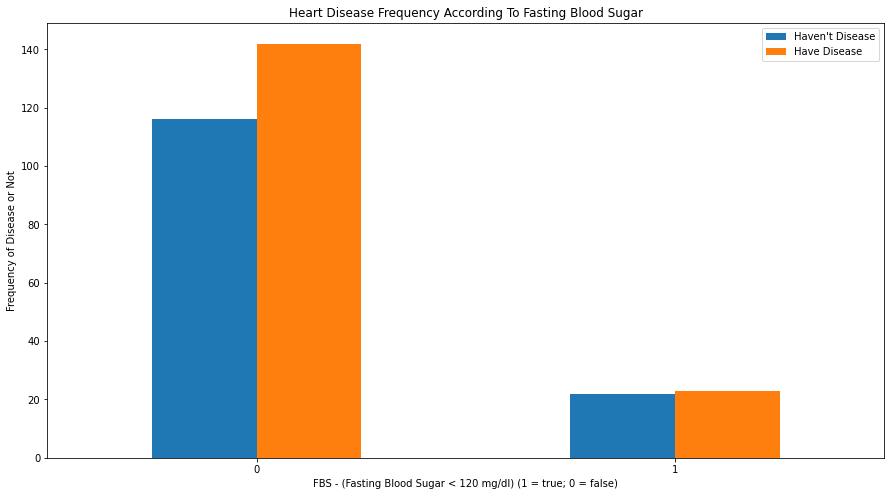

In [15]:
#Finding frequency of heart disease with Fasting blood sugar. 
pd.crosstab(df.fasting_blood_sugar 	,df.target).plot(kind="bar",figsize=(15,8))
plt.title('Heart Disease Frequency According To Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar < 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [16]:
#Finding number of fasting blood sugar in patients
fb = df["fasting_blood_sugar"].value_counts()
labels = fb.index
fig = px.bar(fb, title = "fasting blood sugar", text = fb)
fig.show()



Take the cursor over the plot to see the exact properties like age and cholestrol for target.  

In [17]:
#Using scatter plot to find relation between Cholesterol and Age with yellow being target = 0 and blue being target = 1
fig = px.scatter(df, x="age", y="cholesterol", color = "target") 
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color= 'DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

As we can see the cholestrol value is mostly confined between 200-400 with maximum heart rate value is 200. And maximum patients with heart disease have heart rate between 140-180.

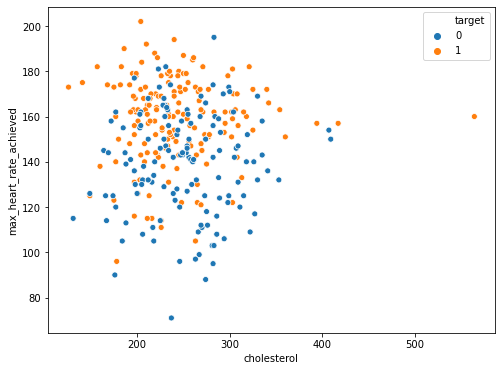

In [18]:
#Relation between cholestrol and maximum heart rate achieved with chances of target either 0 or 1
plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='max_heart_rate_achieved',data=df,hue='target')
plt.show()


The plot below is split for both male and female to draw the plot between cholestrol and resting blood pressure and also using target parameter.

In [19]:
#Faceting is used for splitting the plot into multiple subplots based on the values of a particular row/column. Here we are using facet_col and thus, we end up with 2 subplots each representing 'sex'
fig = px.scatter(df, x = 'resting_blood_pressure', y = 'cholesterol', title='Cholestrol vs Blood Pressure', 
                 facet_col = 'sex', # the name of the column in the dataframe whose values are used for creating subplots
                 color = 'target')
fig.show()


In [20]:
#Relation of major_vessels with target = 1
fig = px.bar(df, x = "num_major_vessels", y = "target")
fig.show()

In [21]:
#'chest_pain_type', 'thalassemia' and 'st_slope' are categorical variables we'll turn them into dummy variables.
a = pd.get_dummies(df['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(df['thalassemia'], prefix = "thalassemia")
c = pd.get_dummies(df['st_slope'], prefix = "st_slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [22]:
#Dropping the categorical variable
df = df.drop(columns = ['chest_pain_type', 'thalassemia', 'st_slope'])
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
#Alloting target as 'y'
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = df.target.values
x_data = df.drop(['target'], axis = 1)

#Normalize the data
# scaler_norm = MinMaxScaler().fit(x_data)
# x_normalized = scaler_norm.transform(x_data)
# x_normalized = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


scaler = MinMaxScaler()
names = x_data.columns
d = scaler.fit_transform(x_data)
x_normalized = pd.DataFrame(d, columns=names)

#numerical features 
num_cols = ['resting_blood_pressure','cholesterol','max_heart_rate_achieved','age']

# standardrization only be done in the numerical features 

# Standardrization of data 



x_std = x_data.copy()

for i in num_cols:
    
    #fit on training data column
    scaler_std = StandardScaler().fit(x_std[[i]])
    #transform
    x_std[i] = scaler_std.transform(x_std[[i]])
#Finding the shape of 'x'



In [24]:

x_normalized

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,...,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,st_slope_0,st_slope_1,st_slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
#We will split our data. 80% of our data will be train data and 20% of it will be test data
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_normalized,y,test_size = 0.2,random_state=42)
x_train_std, x_test_std, y_train_std, y_test_std= train_test_split(x_std,y,test_size = 0.2,random_state=27)


In [26]:
# x_train_norm.shape
# y_train_norm.shape
x_test_norm.shape,
y_test_norm.shape

(61,)

In [27]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#Using decision tree algorithm for prediction
# Since stardardization and normalization have zero impact on decision tree hence we don't use that data here
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc))



Decision Tree Test Accuracy 78.69%


Let's improve our test accuracy by using random forest classifier

In [28]:
data_train_list = [[x_train.T,y_train.T],[x_train_norm,y_train_norm],[x_train_std,y_train_std]]
data_test_list  =[[x_test.T,y_test.T],[x_test_norm,y_test_norm],[x_test_std,y_test_std]]




# for (i , j) in zip(data_train_list,data_test_list):
#     rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
#     rf.fit(i[0], i[1])
#     acc = rf.score(j[0],j[1])*100
#     print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

rf = RandomForestClassifier(n_estimators = 100, random_state = 0,)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.89%


In [29]:
for (i , j) in zip(data_train_list,data_test_list):
    rf = LogisticRegression(max_iter=1500)
    rf.fit(i[0], i[1])
    acc = rf.score(j[0],j[1])*100
    print("Logistic Regression Algorithm Accuracy Score : {:.2f}%".format(acc))

Logistic Regression Algorithm Accuracy Score : 85.25%
Logistic Regression Algorithm Accuracy Score : 86.89%
Logistic Regression Algorithm Accuracy Score : 91.80%


standardize data with logistic regression is giving great accuracy on test data.

In [30]:
for (i , j) in zip(data_train_list,data_test_list):
    rf = SVC(kernel = 'rbf', C = 0.7, gamma = 0.1)
    rf.fit(i[0], i[1])
    acc = rf.score(j[0],j[1])*100
    print("SVC Algorithm Accuracy Score : {:.2f}%".format(acc))

SVC Algorithm Accuracy Score : 55.74%
SVC Algorithm Accuracy Score : 86.89%
SVC Algorithm Accuracy Score : 83.61%


In [31]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.01,0.001],
                     'C': [0.5,0.7, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(gamma='auto'),tuned_parameters)
clf.fit(x_train_norm, y_train_norm)
clf.cv_results_

{'mean_fit_time': array([0.00477777, 0.00506105, 0.0050478 , 0.00422416, 0.00502462,
        0.00519576, 0.00440464, 0.00474539, 0.0051312 , 0.00439911,
        0.00422602, 0.00474386, 0.00546622, 0.00478849, 0.00423698,
        0.0058383 , 0.00653353, 0.00462646, 0.00393715, 0.00568571,
        0.02835445, 0.29979396]),
 'std_fit_time': array([5.85552334e-04, 1.13543388e-04, 2.05702653e-04, 6.80016600e-05,
        5.94680048e-04, 1.51587770e-04, 1.53813033e-04, 1.38376681e-04,
        1.67855038e-04, 1.01145850e-04, 7.55463269e-05, 1.85385947e-04,
        1.84760093e-04, 3.93159700e-04, 1.76120203e-04, 7.17944616e-04,
        2.11304004e-04, 3.92001630e-04, 9.21419920e-05, 9.52173824e-04,
        1.68014314e-02, 1.90346608e-01]),
 'mean_score_time': array([0.00246363, 0.00287838, 0.0025835 , 0.002285  , 0.00262322,
        0.00278139, 0.00259871, 0.00254316, 0.00278273, 0.00247912,
        0.00250306, 0.00272923, 0.00246449, 0.00248485, 0.00228982,
        0.0024497 , 0.00253434, 0.00

In [32]:
clf.best_params_


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [33]:
# 'C': 100, 'gamma': 0.001, 'kernel': 'rbf'
# C= 100, gamma= 0.001, kernel= 'rbf'            
rf = SVC(kernel = 'rbf', C = 0.7, gamma = 0.1)
rf.fit(x_train_norm, y_train_norm)
acc = rf.score(x_test_norm, y_test_norm)*100
print("SVC Algorithm Accuracy Score : {:.2f}%".format(acc))

SVC Algorithm Accuracy Score : 86.89%


In [34]:
clf.best_score_

0.8266156462585034

In [35]:
rf = LogisticRegression(max_iter=1500)
rf.fit(x_train_std, y_train_std)
y_pred = rf.predict(x_test_std)
print(y_pred)
acc = rf.score(x_test_std, y_test_std)*100
print("Logistic Regression Algorithm Accuracy Score : {:.2f}%".format(acc))

    

[1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1]
Logistic Regression Algorithm Accuracy Score : 91.80%


In [36]:
from sklearn.metrics import confusion_matrix,precision_recall_curve
cm = confusion_matrix(y_test_std,y_pred)
print(cm)

[[25  2]
 [ 3 31]]


Logistic Regression giving the best accuracy 91.80%